In [1]:
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.27300,98.0,86,high risk
1,35,140,90,234.23660,98.0,70,high risk
2,29,90,70,144.14560,100.0,80,high risk
3,30,140,85,126.12740,98.0,70,high risk
4,35,120,60,109.91102,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
f"Size of data: {df.shape}"

'Size of data: (1014, 7)'

In [6]:
df['RiskLevel'].value_counts() #entries

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [7]:
df.describe().T #.T for transpose

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0000,19.00000,26.0000,39.0000,70.0000
SystolicBP,1014.0,113.198225,18.403913,70.0000,100.00000,120.0000,120.0000,160.0000
DiastolicBP,1014.0,76.460552,13.885796,49.0000,65.00000,80.0000,90.0000,100.0000
BS,1014.0,157.226564,59.343513,108.1092,124.32558,135.1365,144.1456,342.3458
BodyTemp,1014.0,98.665089,1.371384,98.0000,98.00000,98.0000,98.0000,103.0000
HeartRate,1014.0,74.301775,8.088702,7.0000,70.00000,76.0000,80.0000,90.0000


In [8]:
print(df['RiskLevel'].unique())


['high risk' 'low risk' 'mid risk']


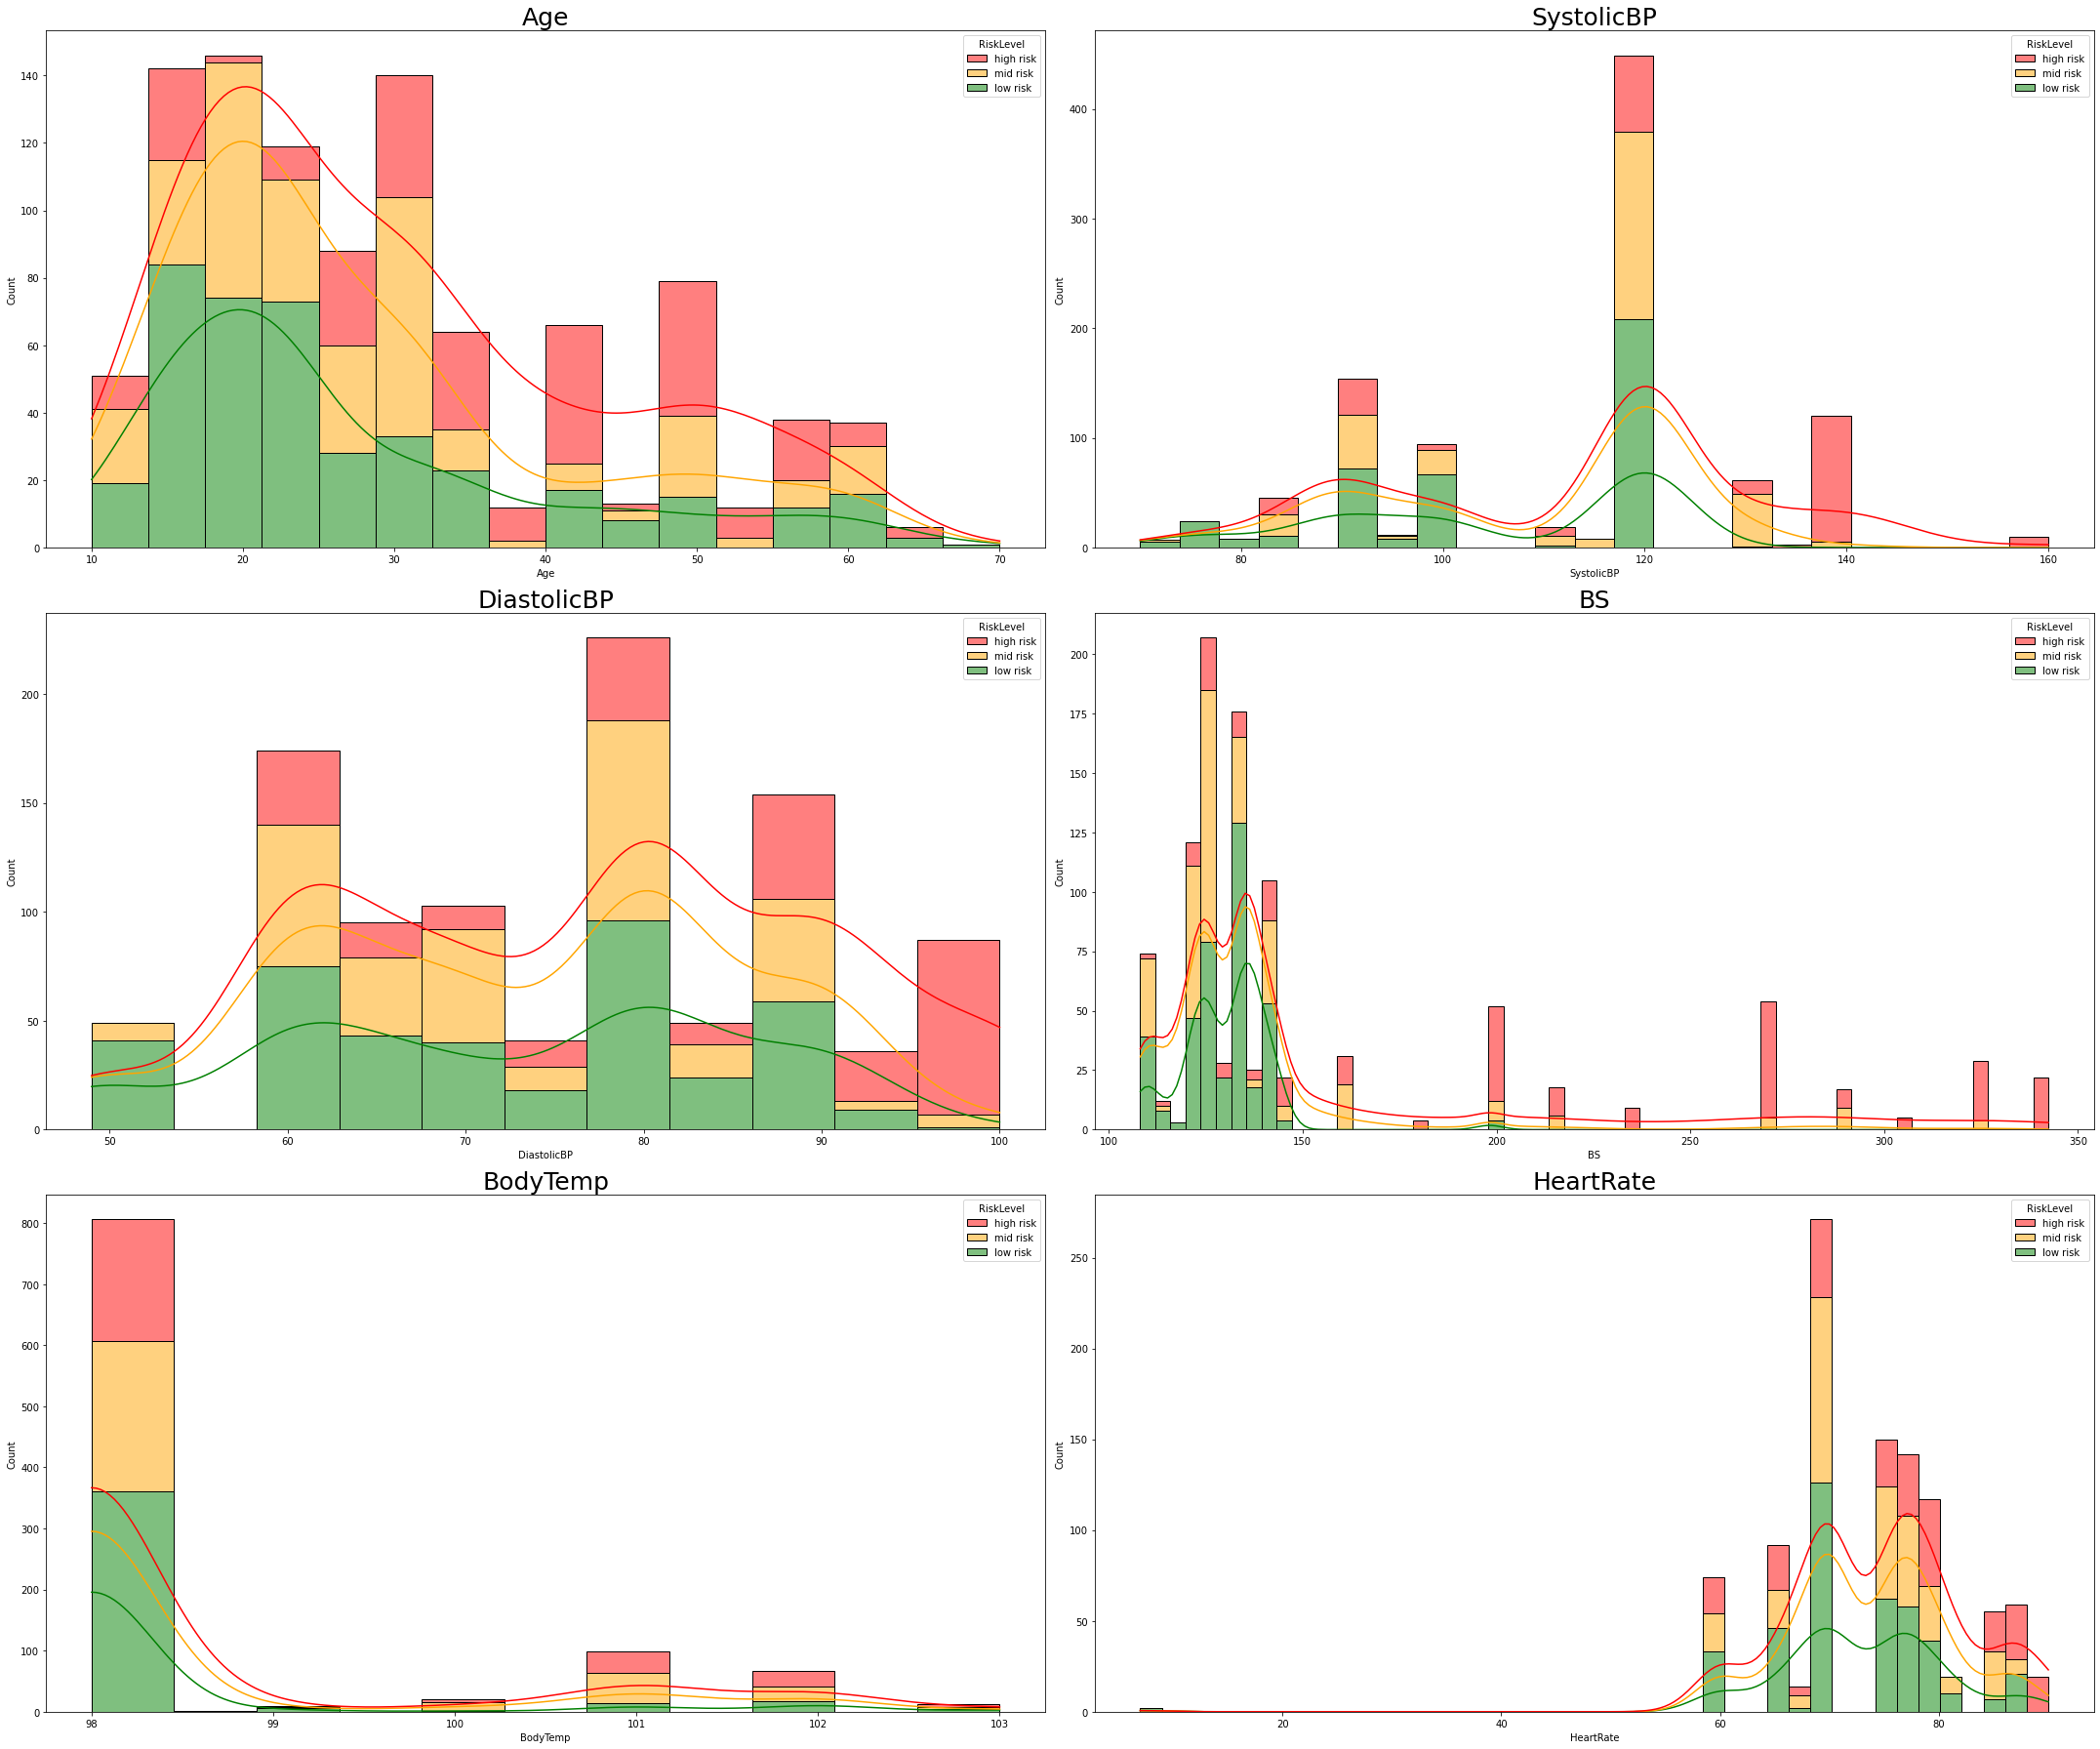

In [9]:
#plot stacked histogram for the feature variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30,25))
risk_level_order = ['high risk','mid risk','low risk']

for ax, column in zip(axes.flatten(), df.columns):
    sns.histplot(data=df,
                x=column,
                kde=True,
                hue = 'RiskLevel',
                hue_order=risk_level_order,
                multiple='stack',
#                 palette={'low risk': 'green','mid risk': 'orange', 'high risk': 'red'},
                palette={'low risk': 'green','mid risk': 'orange', 'high risk': 'red'},
                element = 'bars', ax=ax)
    ax.set_title(f"{column}", fontsize=25)
plt.tight_layout()
# plt.savefig('maternal_features_description.png')
plt.show()

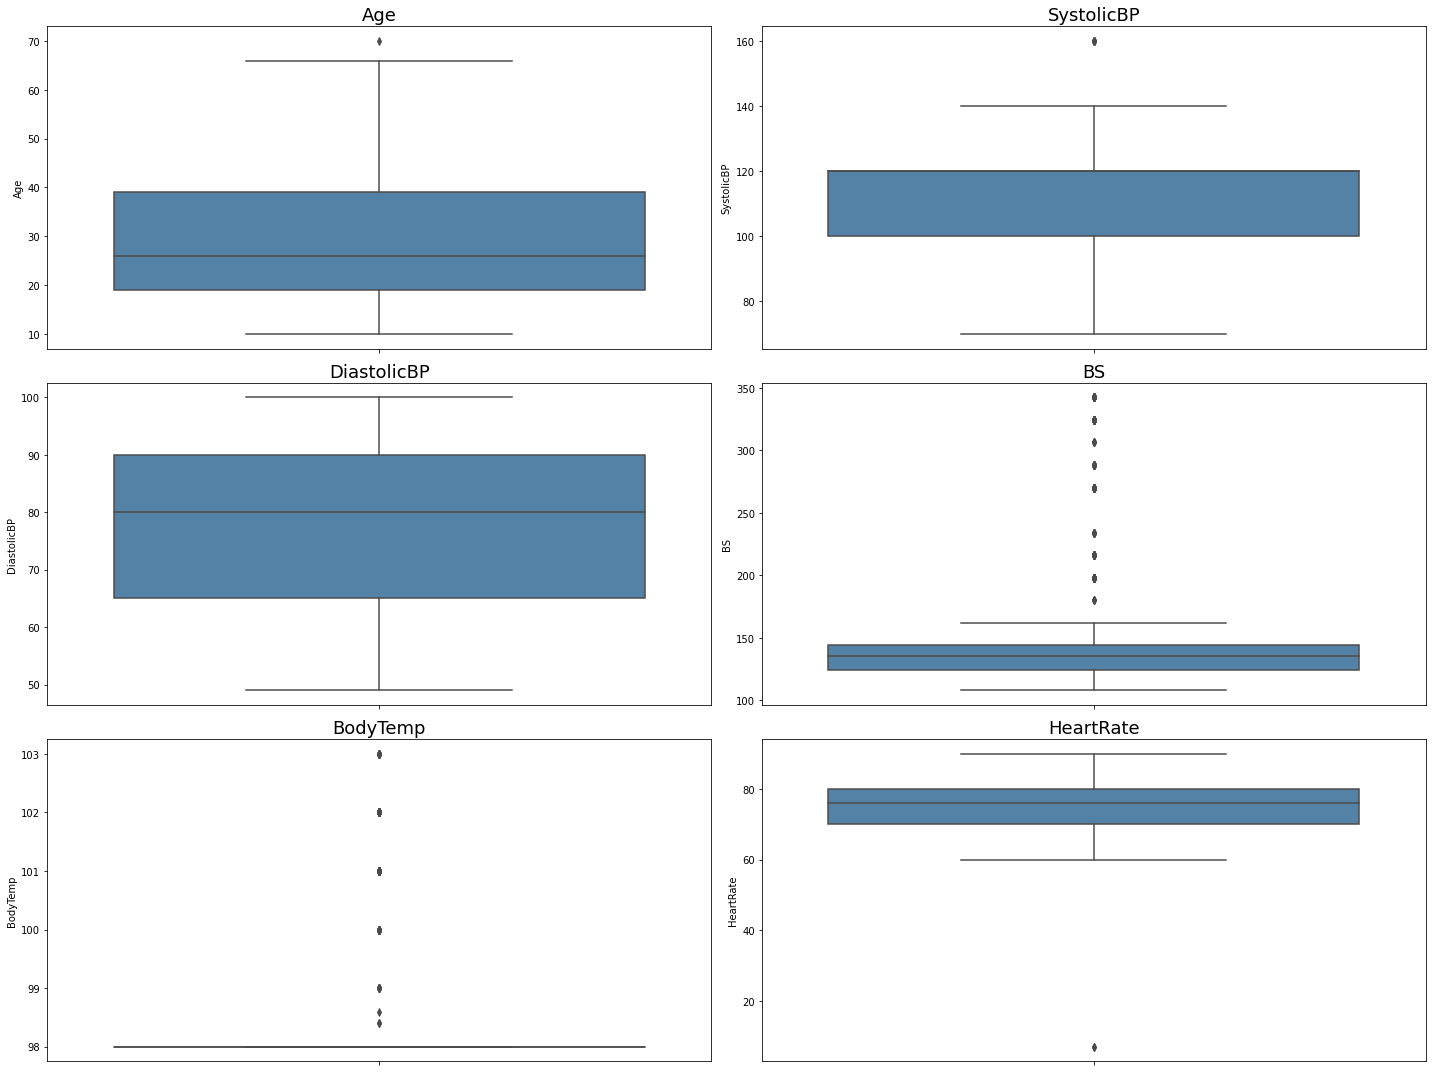

In [10]:
#plot boxplots for the feature variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

for ax, column in zip(axes.flatten(), df.columns):
    sns.boxplot(y=df[column],
               color='#4682B4',
               ax=ax)
    ax.set_title(f"{column}", fontsize = 18)

plt.tight_layout()
# plt.savefig('maternal_skewed_destribution_to_check_outliers.png')
plt.show()

## Correlation Analysis of variable

In [11]:
#Map RiskLevel to integer values
risk_mapping = {'low risk':0, 'mid risk':1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


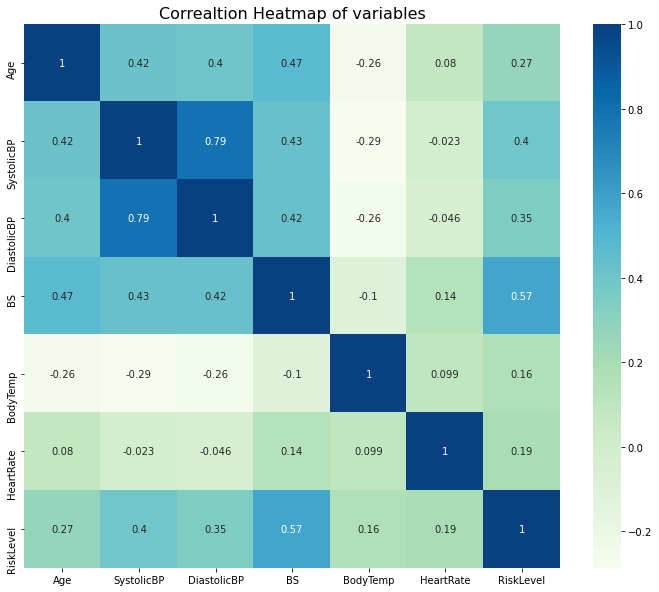

In [12]:
#create correlataion heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Correaltion Heatmap of variables", fontsize=16)
# plt.savefig('maternal_heat_map_to_check_correlation.png')
plt.show()

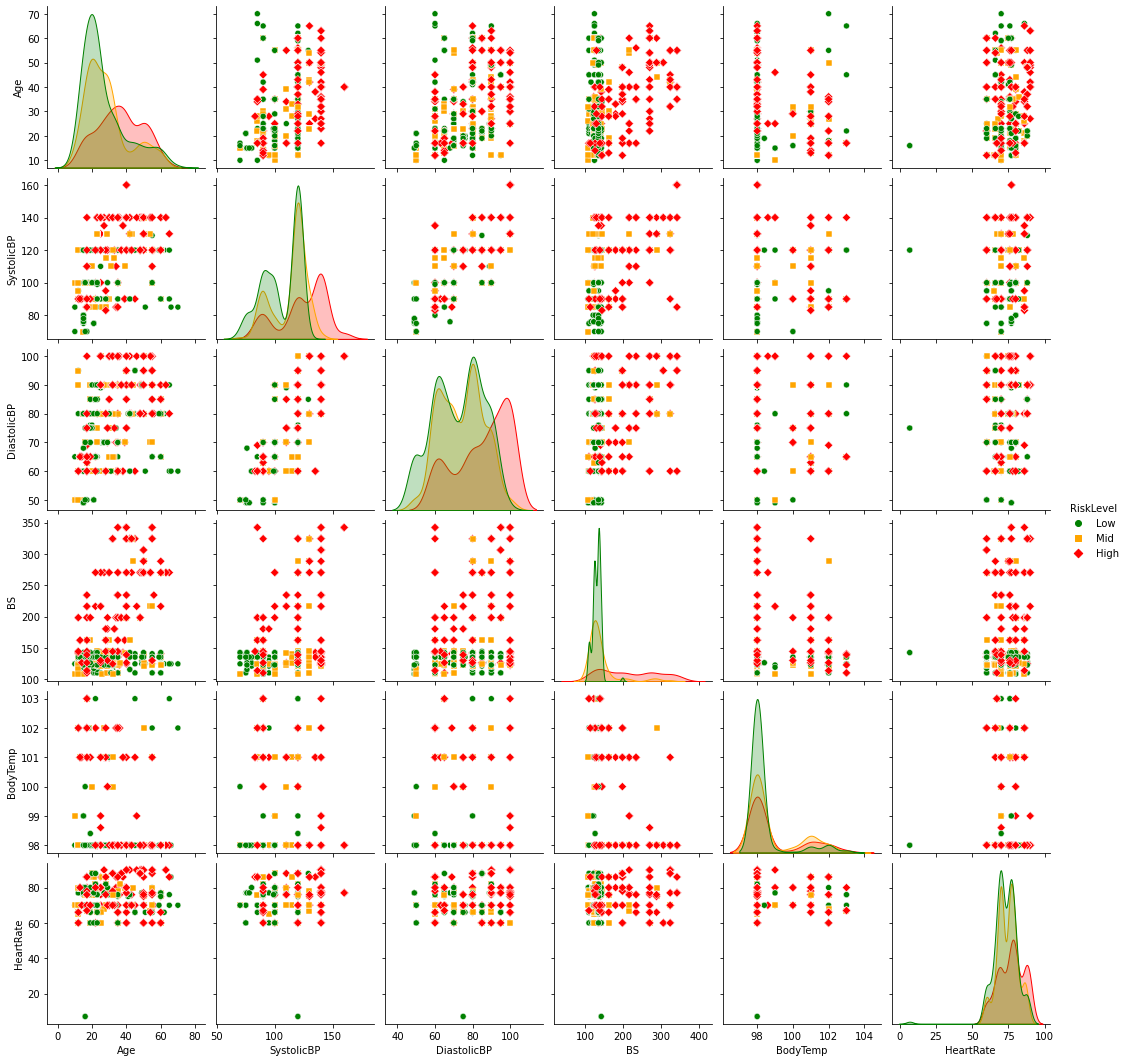

In [13]:
#create a pairplot with RiskLevel
risk_colors = {0: "green",1: 'orange',2:"red"}

plot = sns.pairplot(df, hue='RiskLevel',
                   palette=risk_colors,
                   markers=["o","s","D"])
legend_labels={"0":"Low","1":"Mid","2":"High"}
for text, label in zip(plot._legend.texts, legend_labels.values()):
    text.set_text(label)
# plt.savefig("maternal_pairplot_to_see_patterns.png")
plt.show()

In [14]:
#dealing with multicollinearity
#variance inflation factor (VIF) calculation
X = df[['SystolicBP','DiastolicBP']]
vif_data=pd.DataFrame()
vif_data['Variable'] = X.columns
# vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable
0,SystolicBP
1,DiastolicBP


In [15]:
#Drop systolicBP for model training
df = df.drop(['SystolicBP'],axis=1)

In [16]:
#Identify the outlier in HeartRate
df.HeartRate.sort_values().head()

908     7
499     7
702    60
783    60
784    60
Name: HeartRate, dtype: int64

In [17]:
#Remove the outlier in HeartRate
df = df.drop(df.index[df.HeartRate==7])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


# Model Building

In [19]:
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

In [20]:
from collections import Counter

In [21]:
#Algorithms
from statsmodels.stats.outliers_influence import variance_inflation_factor #->for outliers
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support

In [22]:
#Feature scalling
columns = ['Age','DiastolicBP','BP','BodyTemp','HeartRate']
scale_X = StandardScaler() #put every thing on same scale (between -1 to 1 ig) irrespective of units
X =pd.DataFrame(scale_X.fit_transform(df.drop(['RiskLevel'],axis=1),),columns=columns) #x = feature
y=df['RiskLevel'] #y = lable(our prediction)

In [23]:
X.head(4)

,Age,DiastolicBP,BP,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878


In [24]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #stratify: split data into the original ration in which data is.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 5), (203, 5), (809,), (203,))

# Logistic Regression

In [25]:
#Baseline model of Logistic Regression
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")
pred_logistic_regression= logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.64


In [26]:
#Cross validation logistic modle
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv=3, scoring="accuracy")
print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans:{round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(),3)}")

Scores(Cross validate) for Logistic Regression model:
[0.6037037  0.5962963  0.57992565]
CrossValMeans:0.593
CrossValStandard Deviation: 0.01


In [27]:
param_LR = {"tol":[0.0001,0.0002,0.0003],
            "C":[0.01,0.1,1,10,100],
            "intercept_scaling":[1,23,4],
            "solver":['liblinear','lbfs','newton-cg'],
            'max_iter':[100,200,300],}

In [28]:
GridSearchCV_LR = GridSearchCV(estimator = linear_model.LogisticRegression(),
                              param_grid=param_LR,
                              cv=3,
                              scoring="accuracy",
                              return_train_score=True,
                              )

In [29]:
GridSearchCV_LR.fit(X_train,y_train);

In [30]:
print(f"Best estimator for LR model:\n{GridSearchCV_LR.best_estimator_}")
print(f"Best parameter values for LR model:\n{GridSearchCV_LR.best_params_}")
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_,3)}")

Best estimator for LR model:
LogisticRegression(C=0.01, solver='liblinear')
Best parameter values for LR model:
{'C': 0.01, 'intercept_scaling': 1, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}
Best score for LR model: 0.602


In [31]:
#Teat with new parameter
logistic_regression = linear_model.LogisticRegression(C=0.01, intercept_scaling=1,max_iter=100,solver='liblinear',tol=0.0001, random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [32]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression,3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train,3)}")
print(f"R^2(coefficient of determination) on testing set ={round(score_logistic_regression_test,3)}")

Mean Square Error for Logistic Regression = 0.512
Root Mean Square Error for Logistic Regression = 0.716
R^2(coefficient of determination) on training set = 0.609
R^2(coefficient of determination) on testing set =0.635


In [33]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.70        81
           1       0.56      0.21      0.30        67
           2       0.77      0.80      0.79        55

    accuracy                           0.64       203
   macro avg       0.64      0.63      0.60       203
weighted avg       0.63      0.64      0.59       203

Confusion Matrix:
[[71  6  4]
 [44 14  9]
 [ 6  5 44]]


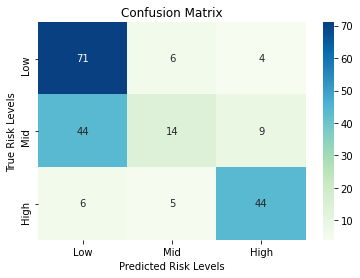

In [34]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_logistic_regression), annot=True, ax=ax, cmap='GnBu');

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Low","Mid","High"]);
ax.yaxis.set_ticklabels(["Low","Mid","High"]);

# K nearest neighbours

In [35]:
#Baseline model of K-Nearest Neighbours
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbour: {round(knn_mod.score(X_test, y_test), 3)}")
pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbour: 0.66


In [36]:
#cross validation k-nearest neighbour model
scores_knn = cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")
print(f"Scores(Cross validate) for K-Nearest Neighbour model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(),3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(),3)}")

Scores(Cross validate) for K-Nearest Neighbour model:
[0.61481481 0.66666667 0.64684015]
CrossValMeans: 0.643
CrossValStandard Deviation: 0.021


In [37]:
param_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p":[1,2],
              "weights": ['uniform','distance'],
             }

In [38]:
GridSearchCV_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                              param_grid=param_knn,
                              cv=3,
                              scoring="accuracy",
                              return_train_score=True,
                              )

In [39]:
#Fit model with train data
GridSearchCV_knn.fit(X_train,y_train);

In [40]:
print(f"Best estimator for Knn:\n{GridSearchCV_knn.best_estimator_}")
print(f"Best parameter values :\n{GridSearchCV_knn.best_params_}")
print(f"Best score for GNB model: {round(GridSearchCV_knn.best_score_,3)}")

Best estimator for Knn:
KNeighborsClassifier(leaf_size=1, n_neighbors=10, weights='distance')
Best parameter values :
{'leaf_size': 1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best score for GNB model: 0.795


In [41]:
#Test with new parameter
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=10, p=2, weights="distance")
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

In [42]:
print(f"Mean Square Error for knn = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for knn = {round(rmse_knn,3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train,3)}")
print(f"R^2(coefficient of determination) on testing set ={round(score_knn_test,3)}")

Mean Square Error for knn = 0.251
Root Mean Square Error for knn = 0.501
R^2(coefficient of determination) on training set = 0.934
R^2(coefficient of determination) on testing set =0.837


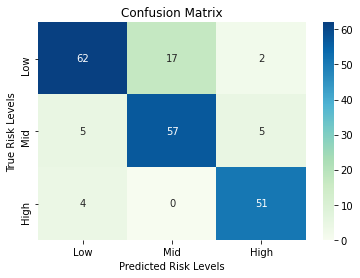

In [43]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_knn), annot=True, ax=ax, cmap='GnBu');

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Low","Mid","High"]);
ax.yaxis.set_ticklabels(["Low","Mid","High"]);

# Random Forest

In [44]:
#Baseline model of Random Forest
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")
pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.842


In [45]:
# Cross validate Random Forest Classifier model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv=3, scoring = "accuracy")
print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.8        0.79259259 0.82527881]
CrossValMeans: 0.806
CrossValStandard Deviation: 0.014


In [46]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 2, 4],
              "n_estimators" :[50,100,200,300,400],
              "max_depth": [None, 10, 20, 30],
              "criterion": ["gini", "entropy"]             
              }

In [47]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF,
                                cv=3,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [48]:
GridSearchCV_RF.fit(X_train, y_train);

In [49]:
print(f"Best estimator for RF model:\n{GridSearchCV_RF.best_estimator_}")
print(f"Best parameter values for RF model:\n{GridSearchCV_RF.best_params_}")
print(f"Best score for RF model: {round(GridSearchCV_RF.best_score_, 3)}")

Best estimator for RF model:
RandomForestClassifier(criterion='entropy', n_estimators=50)
Best parameter values for RF model:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score for RF model: 0.821


In [50]:
# Test with new parameter
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [51]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.236
Root Mean Square Error for Random Forest = 0.486
R^2(coefficient of determination) on training set = 0.934
R^2(coefficient of determination) on testing set = 0.837


In [52]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.79      0.79      0.79        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[64 14  3]
 [ 9 53  5]
 [ 2  0 53]]


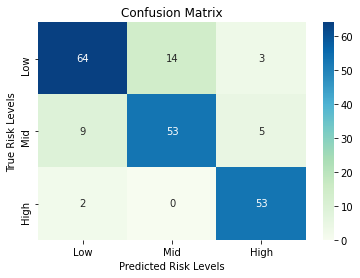

In [53]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

# Gradient Boosting Classifier

In [59]:
# Baseline model of gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")
pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.783


In [60]:
# Cross validate Gradient Boosting Classifier model
scores_GBC = cross_val_score(gbc, X_train, y_train, cv=3, scoring="accuracy")
print(f"Scores (Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores (Cross validate) for Gradient Boosting Classifier model:
[0.74814815 0.78518519 0.80297398]
CrossValMeans: 0.779
CrossValStandard Deviation: 0.023


In [62]:
params_GBC = {
    "loss": ["log_loss"],  # Corrected from 'deviance' to 'log_loss'
    "learning_rate": [0.01, 0.05, 0.075, 0.1], 
    "n_estimators": [100, 250, 500],
    "max_depth": [3, 5, 8, 10],
    "subsample": [0.8, 1],
}

In [63]:
GridSearchCV_GBC = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params_GBC,
    cv=3,
    scoring="accuracy",
    return_train_score=True
)

In [64]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.075, 0.1],
                         'loss': ['log_loss'], 'max_depth': [3, 5, 8, 10],
                         'n_estimators': [100, 250, 500],
                         'subsample': [0.8, 1]},
             return_train_score=True, scoring='accuracy')

In [65]:
print(f"Best estimator values for GBC model:\n{GridSearchCV_GBC.best_estimator_}")
print(f"Best parameter values for GBC model:\n{GridSearchCV_GBC.best_params_}")
print(f"Best score value foe GBC model: {round(GridSearchCV_GBC.best_score_, 3)}")

Best estimator values for GBC model:
GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=1)
Best parameter values for GBC model:
{'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 500, 'subsample': 1}
Best score value foe GBC model: 0.827


In [69]:
# Test with new parameters
gbc = GradientBoostingClassifier(
    learning_rate=0.5,
    loss="log_loss",  # Corrected from 'deviance' to 'log_loss'
    max_depth=10,
    n_estimators=100,
    subsample=1,
    random_state=42
)
# Fit the model
gbc_mod = gbc.fit(X_train, y_train)

# Make predictions
pred_gbc = gbc_mod.predict(X_test)

# Calculate performance metrics
mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mse_gbc)
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

In [70]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.232
Root Mean Square Error for Gradient Boosting Classifier = 0.481
R^2(coefficient of determination) on training set = 0.934
R^2(coefficient of determination) on testing set = 0.842


In [71]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        81
           1       0.80      0.79      0.80        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[65 13  3]
 [ 9 53  5]
 [ 2  0 53]]


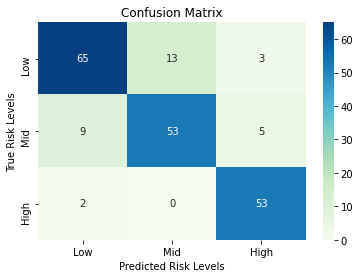

In [72]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk Levels");
ax.set_ylabel("True Risk Levels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [73]:
# Create a DataFrame to store model evaluation results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting Classifier"],
    "Train Score": [
        # Calculate mean cross-validated accuracy for training set
        cross_val_score(logistic_regression_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(knn_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(random_forest_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(gbc_mod, X_train, y_train, cv=3).mean(),
    ],
    "Test Score": [
        # Calculate accuracy on the test set
        logistic_regression_mod.score(X_test, y_test),
        knn_mod.score(X_test, y_test),
        random_forest_mod.score(X_test, y_test),
        gbc_mod.score(X_test, y_test),
    ]
})
# Additional Metrics (precision, recall, F1 score)
metrics = ["precision", "recall", "f1"]
for metric in metrics:
    results[f"{metric.capitalize()}"] = [
        precision_recall_fscore_support(y_test, model.predict(X_test), average="weighted")[metrics.index(metric)]
        for model in [logistic_regression_mod, knn_mod, random_forest_mod, gbc_mod]
    ]

result_df = results.sort_values(by="Test Score", ascending=False)
result_df = result_df.set_index("Test Score")
result_df

,Model,Train Score,Precision,Recall,F1
Test Score,,,,,
0.842365,Gradient Boosting Classifier,0.810891,0.841706,0.842365,0.841021
0.837438,K-Nearest Neighbors,0.794818,0.840899,0.837438,0.836922
0.837438,Random Forest,0.810891,0.836980,0.837438,0.836060
0.635468,Logistic Regression,0.601960,0.628104,0.635468,0.593824


In [74]:
import pickle

In [75]:
pickle.dump(gb_classifier, open('fetal_health_classifier.sav', 'wb'))